# Does the trend of the job topic in the State of the Union Addresses correlate with that of the unemployment rate over time?

In [1]:
# All Dependencies are added here
import pandas as pd
import os
from collections import Counter
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from scipy import misc

## Data Preparation

In [2]:
path = r"./data"
dirs = os.listdir(path)

In [4]:
dirs

['Bush_1989.txt',
 'Bush_1990.txt',
 'Bush_1991.txt',
 'Bush_1992.txt',
 'Bush_2001.txt',
 'Bush_2002.txt',
 'Bush_2003.txt',
 'Bush_2004.txt',
 'Bush_2005.txt',
 'Bush_2006.txt',
 'Bush_2007.txt',
 'Bush_2008.txt',
 'Clinton_1993.txt',
 'Clinton_1994.txt',
 'Clinton_1995.txt',
 'Clinton_1996.txt',
 'Clinton_1997.txt',
 'Clinton_1998.txt',
 'Clinton_1999.txt',
 'Clinton_2000.txt',
 'Obama_2009.txt',
 'Obama_2010.txt',
 'Obama_2011.txt',
 'Obama_2012.txt',
 'Obama_2013.txt',
 'Obama_2014.txt',
 'Obama_2015.txt',
 'Obama_2016.txt',
 'Trump_2017.txt']

In [5]:
# define a function to count words in a give text file in the directory
def count_words(word, filename):
    file = open(path + "/"+ filename, encoding='utf8')
    text = file.read().lower()
    words = nltk.word_tokenize(text)
    word_counter = Counter(words)
    word_count = word_counter[word]
    return word_count

In [6]:
# Create a list of dictionaries from proccing the text files. These dictionaries will be used to create Pandas DataFrames
file_dict_list = []
for filename in dirs:
    file_dict = {}
    job_word_count = count_words('job',filename) + count_words('jobs', filename)
    file_dict['year'] = int(filename[-8:-4])
    file_dict['job_word_count'] = job_word_count
    file_dict_list.append(file_dict)
print(file_dict_list)

[{'year': 1989, 'job_word_count': 5}, {'year': 1990, 'job_word_count': 3}, {'year': 1991, 'job_word_count': 5}, {'year': 1992, 'job_word_count': 11}, {'year': 2001, 'job_word_count': 4}, {'year': 2002, 'job_word_count': 13}, {'year': 2003, 'job_word_count': 4}, {'year': 2004, 'job_word_count': 13}, {'year': 2005, 'job_word_count': 6}, {'year': 2006, 'job_word_count': 7}, {'year': 2007, 'job_word_count': 6}, {'year': 2008, 'job_word_count': 6}, {'year': 1993, 'job_word_count': 25}, {'year': 1994, 'job_word_count': 30}, {'year': 1995, 'job_word_count': 19}, {'year': 1996, 'job_word_count': 14}, {'year': 1997, 'job_word_count': 14}, {'year': 1998, 'job_word_count': 16}, {'year': 1999, 'job_word_count': 8}, {'year': 2000, 'job_word_count': 10}, {'year': 2009, 'job_word_count': 18}, {'year': 2010, 'job_word_count': 29}, {'year': 2011, 'job_word_count': 31}, {'year': 2012, 'job_word_count': 42}, {'year': 2013, 'job_word_count': 43}, {'year': 2014, 'job_word_count': 37}, {'year': 2015, 'job_w

In [7]:
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(file_dict_list)
df

,job_word_count,year
0,5,1989
1,3,1990
2,5,1991
3,11,1992
4,4,2001
5,13,2002
6,4,2003
7,13,2004
8,6,2005
9,7,2006


In [8]:
df.set_index('year', inplace=True)
df

,job_word_count
year,
1989,5
1990,3
1991,5
1992,11
2001,4
2002,13
2003,4
2004,13
2005,6


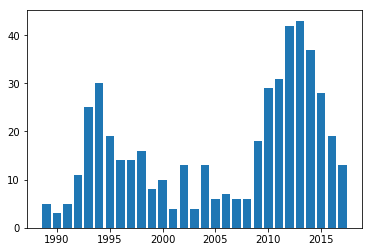

In [9]:
# Plot of the job word counts
years = df.index
job_word_count = df['job_word_count'].values
plt.bar(years,job_word_count)
plt.show()

In [10]:
#create another DataFrame from the CSV
jobless_rate = pd.read_csv('unemployment_rate.csv', sep=',')
jobless_rate.set_index('Year', inplace=True)
jobless_rate['Annual'] = jobless_rate.mean(axis = 1)
jobless_rate

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Year,,,,,,,,,,,,,
1989,5.4,5.2,5.0,5.2,5.2,5.3,5.2,5.2,5.3,5.3,5.4,5.4,5.258333
1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3,5.616667
1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3,6.850000
1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4,7.491667
1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5,6.908333
1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5,6.100000
1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6,5.591667
1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4,5.408333
1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7,4.941667


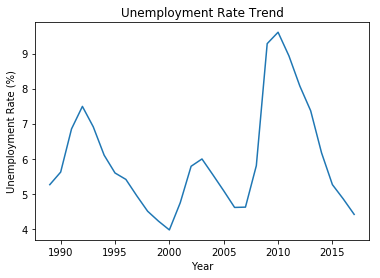

In [11]:
#Plot the unemployment trend
years = jobless_rate.index
joblessness = jobless_rate['Annual'].values
plt.plot(years, joblessness)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Trend")
plt.show()

In [12]:
#Merge the two DFs
final_df = pd.merge(jobless_rate, df, left_index=True, right_index=True)
final_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,job_word_count
1989,5.4,5.2,5.0,5.2,5.2,5.3,5.2,5.2,5.3,5.3,5.4,5.4,5.258333,5
1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3,5.616667,3
1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3,6.850000,5
1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4,7.491667,11
1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5,6.908333,25
1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5,6.100000,30
1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6,5.591667,19
1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4,5.408333,14
1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7,4.941667,14
1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4,4.500000,16


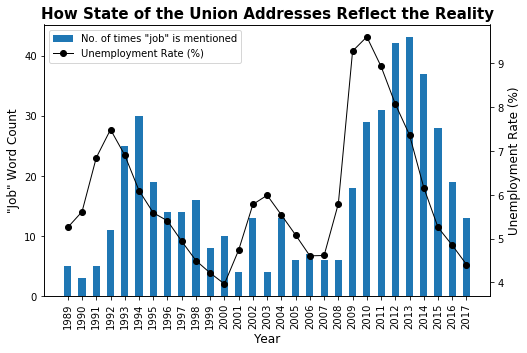

In [13]:
#Plotting the two trends in the same plot.

fig, ax1 = plt.subplots(figsize=(8,5))
final_df['job_word_count'].plot(kind='bar', stacked=False, ax=ax1, label='No. of times "job" is mentioned')
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), final_df['Annual'].values, linestyle='-', marker='o', color='k', linewidth=1.0, label='Unemployment Rate (%)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

ax1.set_title('How State of the Union Addresses Reflect the Reality',fontweight="bold", size=15)
ax1.set_ylabel('"Job" Word Count', fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("Unemployment Rate (%)", fontsize=12)

plt.show()

In [14]:
# A closer look at the text of 2003
bush_2003_filename = "Bush_2003.txt"
bush_2003_file = open(path + "/"+ "Bush_2003.txt", encoding='utf8')
bush_2003_text = bush_2003_file.read().lower()
bush_2003_words = nltk.word_tokenize(bush_2003_text)

useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation) + ["will", "americans", "america", "american", "—", "'s"]

bush_2003_words_filtered = [word for word in bush_2003_words if word not in useless_words]
bush_2003_word_counter = Counter(bush_2003_words_filtered)
most_common_words_2003 = bush_2003_word_counter.most_common()
most_common_words_2003


[('people', 32),
 ('weapons', 27),
 ('world', 26),
 ('country', 20),
 ('saddam', 19),
 ('hussein', 19),
 ('must', 18),
 ('many', 17),
 ('every', 15),
 ('united', 15),
 ('nation', 14),
 ('one', 14),
 ('iraq', 14),
 ('year', 13),
 ('years', 13),
 ('us', 13),
 ('government', 12),
 ('nuclear', 12),
 ('new', 11),
 ('tonight', 11),
 ('help', 11),
 ('could', 11),
 ('aids', 11),
 ('war', 11),
 ('inspectors', 11),
 ('congress', 10),
 ('work', 10),
 ('security', 10),
 ('economy', 10),
 ('million', 10),
 ('care', 10),
 ('threat', 10),
 ('power', 10),
 ('nations', 10),
 ('intelligence', 10),
 ('citizens', 9),
 ('ask', 9),
 ('peace', 9),
 ('states', 9),
 ('life', 8),
 ('tax', 8),
 ('good', 8),
 ('yet', 8),
 ('make', 8),
 ('drugs', 8),
 ('energy', 8),
 ('al', 8),
 ('qaeda', 8),
 ('iraqi', 8),
 ('great', 7),
 ('next', 7),
 ('also', 7),
 ('health', 7),
 ('chemical', 7),
 ('children', 7),
 ('africa', 7),
 ('terrorists', 7),
 ('materials', 7),
 ('know', 7),
 ('protect', 6),
 ('bring', 6),
 ('first', 6),

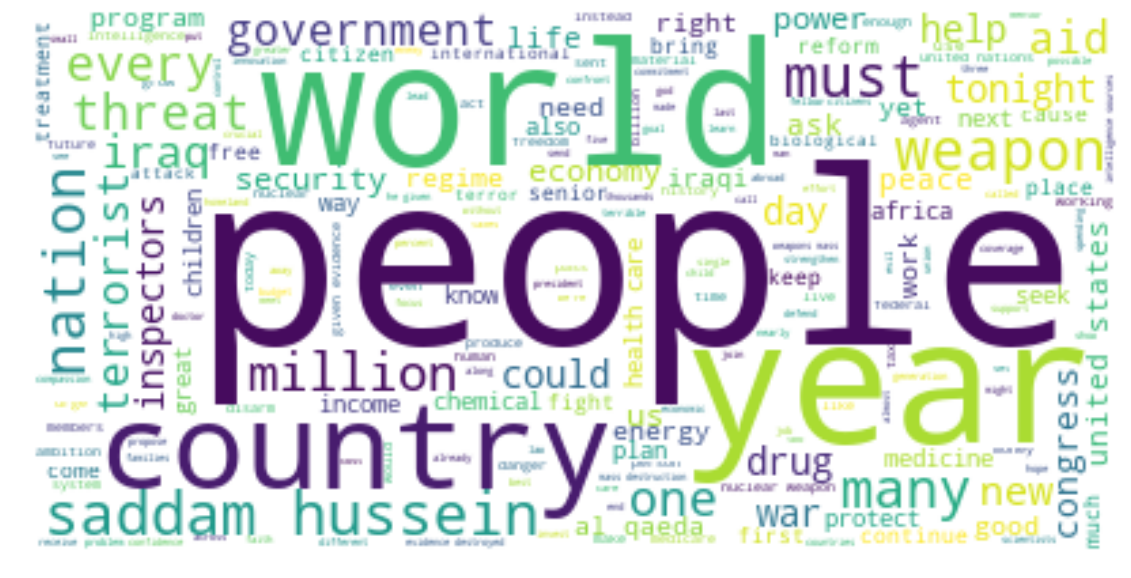

In [17]:
# Generate a masked word cloud
#mask_image = misc.imread('/Untitled.png')
useless_word_set = set(useless_words)
word_cloud = WordCloud(background_color="white", stopwords=useless_word_set)
word_cloud.generate(bush_2003_text)

plt.figure(figsize=(20, 10))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
#plt.imshow(alice_mask, interpolation='bilinear')
#plt.axis("off")
plt.show()
